In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage import io, restoration, filters, morphology

In [2]:
experiment = 'GPMV/20220407-GPMV-withRGDPEG5-PLL'
guvs = os.listdir(f'Data/{experiment}/results')
guvs

['AVG_Protocol12-1_67.37nm',
 'AVG_Protocol16-1_64.46nm',
 'AVG_Protocol18-1_59.73nm',
 'AVG_Protocol18-2_60.13nm',
 'AVG_Protocol18-3_61.50nm',
 'AVG_Protocol110-1_57.29nm',
 'AVG_Protocol110-2_57.15nm',
 'AVG_Protocol115-1_61.91nm']

Protocol12-1 67.37 75.59375 4.9 9.8


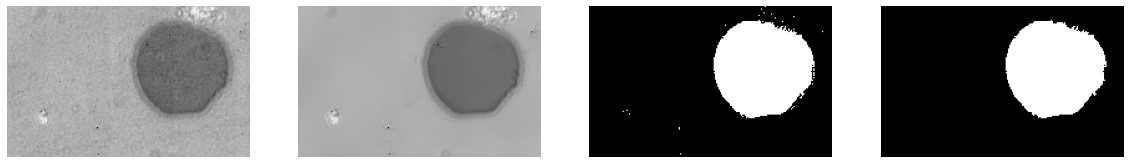

Protocol16-1 64.46 35.6875 3.4 6.8


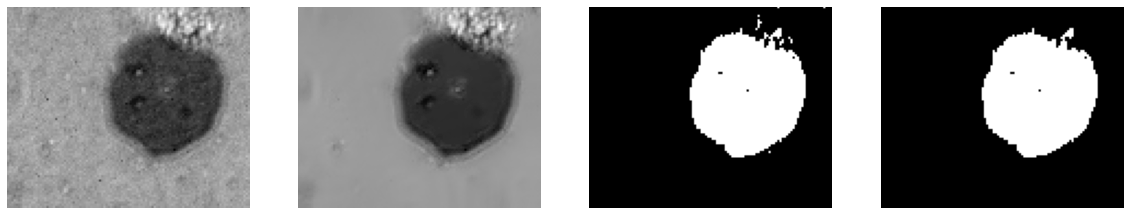

Protocol18-1 59.73 20.25 2.5 5.0


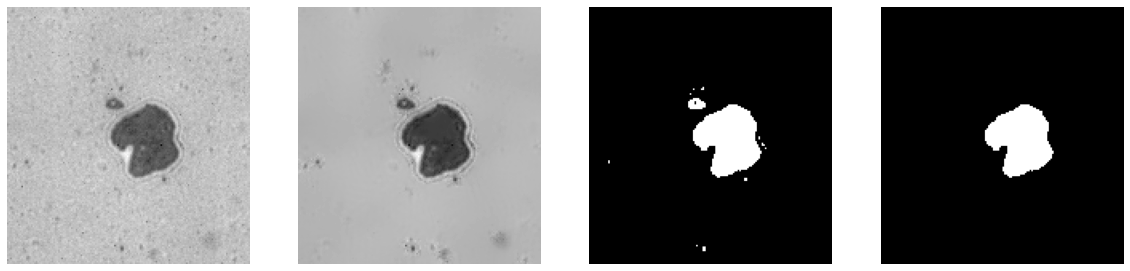

Protocol18-2 60.13 10.875 1.9 3.8


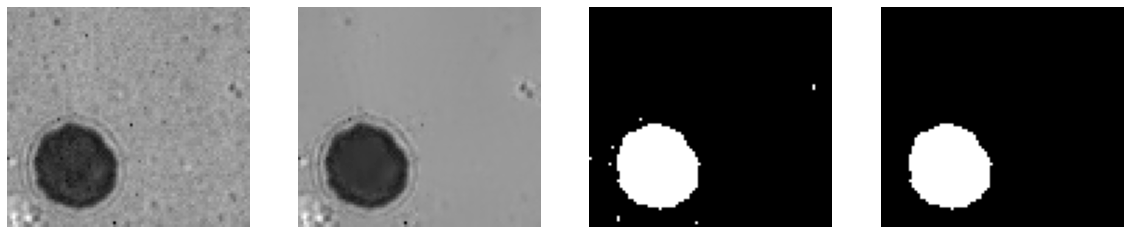

Protocol18-3 61.50 24.28125 2.8 5.6


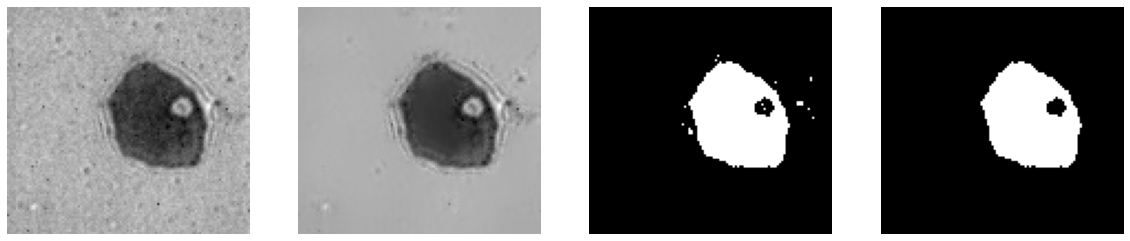

Protocol110-1 57.29 35.859375 3.4 6.8


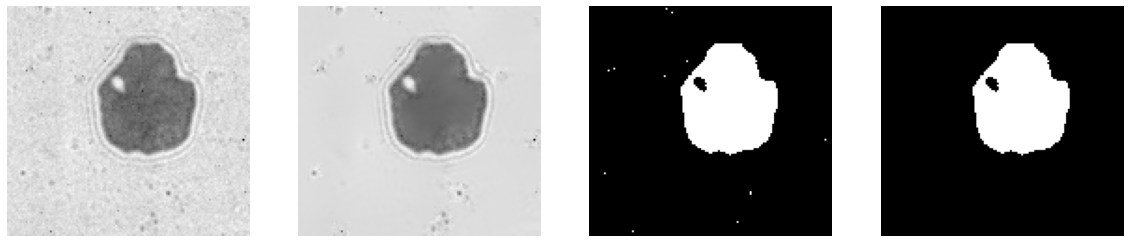

Protocol110-2 57.15 12.375 2.0 4.0


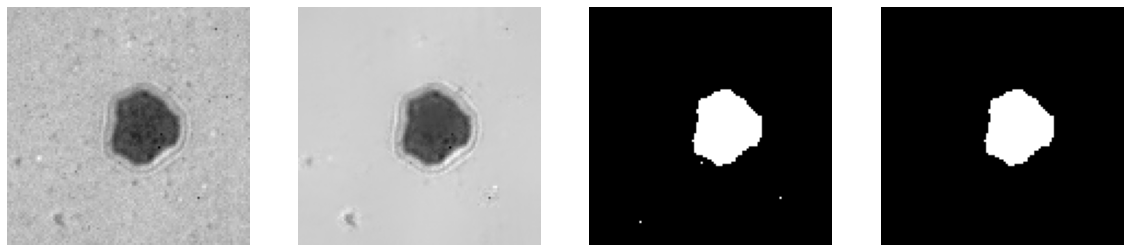

Protocol115-1 61.91 18.0 2.4 4.8


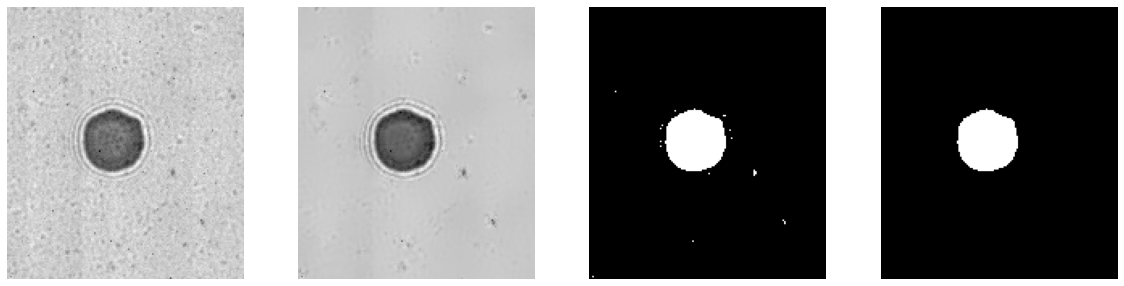

In [4]:
name, height, ricm_area, ricm_radius, ricm_diameter = [], [], [], [], []
for result in guvs:
    # Read the image
    img = io.imread(f'Data/{experiment}/results/{result}/correct.tif')

    # Apply the Non-local means denoising algorithm on the background corrected image
    img_corrected = restoration.denoise_nl_means(img,
                                                 h = np.mean(restoration.estimate_sigma(img)),
                                                 fast_mode = True,
                                                 patch_size = 10,
                                                 patch_distance = 10)

    # Mask
    mask = img_corrected < filters.threshold_otsu(img_corrected)

    # Corrected mask
    mask_corrected = np.multiply(morphology.remove_small_objects(mask, 64), 1)

    # Append the image area, radius, name and height
    ricm_area.append(mask_corrected.sum()*0.125**2)
    ricm_radius.append(np.round(np.sqrt(ricm_area[-1]/np.pi), 1))
    ricm_diameter.append(np.round(2*ricm_radius[-1], 1))
    name.append(result[4:-8])
    height.append(result[-7:-2])
    
    print(name[-1], height[-1], ricm_area[-1], ricm_radius[-1], ricm_diameter[-1])


    # Show the image and it's dinoised version
    plt.figure(figsize=(20,5))

    plt.subplot(141)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(img_corrected, cmap='gray')
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(144)
    plt.imshow(mask_corrected, cmap='gray')
    plt.axis('off')

    plt.show();

In [5]:
df = pd.DataFrame(data={'Name':name, 'Height':height, 'RICM_area':ricm_area, 'RICM_radius':ricm_radius, 'RICM_diameter':ricm_diameter})

df.to_excel(f'Data/{experiment}/results/table.xlsx', index=False)